In [2]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

# the more advanced python visualization library
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# Load the data
df = pd.read_csv('power_consumption_processed.csv')
df.head(10)

,Date_Time,active_power,reactive_power,voltage,current_intensty,active_energy_kitchen,active_energy_laundry,active_energy_ac,other_active_energy
0,2006-12-16 17:24:00,4.22,0.42,234.84,18.40,0.00,1.00,17.00,52.27
1,2006-12-16 17:25:00,5.36,0.44,233.63,23.00,0.00,1.00,16.00,72.33
2,2006-12-16 17:26:00,5.37,0.50,233.29,23.00,0.00,2.00,17.00,70.57
3,2006-12-16 17:27:00,5.39,0.50,233.74,23.00,0.00,1.00,17.00,71.80
4,2006-12-16 17:28:00,3.67,0.53,235.68,15.80,0.00,1.00,17.00,43.10
5,2006-12-16 17:29:00,3.52,0.52,235.02,15.00,0.00,2.00,17.00,39.67
6,2006-12-16 17:30:00,3.70,0.52,235.09,15.80,0.00,1.00,17.00,43.70
7,2006-12-16 17:31:00,3.70,0.52,235.22,15.80,0.00,1.00,17.00,43.67
8,2006-12-16 17:32:00,3.67,0.51,233.99,15.80,0.00,1.00,17.00,43.13
9,2006-12-16 17:33:00,3.66,0.51,233.86,15.80,0.00,2.00,16.00,43.03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
Date_Time                object
active_power             float64
reactive_power           float64
voltage                  float64
current_intensty         float64
active_energy_kitchen    float64
active_energy_laundry    float64
active_energy_ac         float64
other_active_energy      float64
dtypes: float64(8), object(1)
memory usage: 142.5+ MB


In [5]:
# set the datetime column as the index
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df.set_index('Date_Time', inplace=True)
df.head(25)

,active_power,reactive_power,voltage,current_intensty,active_energy_kitchen,active_energy_laundry,active_energy_ac,other_active_energy
Date_Time,,,,,,,,
2006-12-16 17:24:00,4.22,0.42,234.84,18.40,0.00,1.00,17.00,52.27
2006-12-16 17:25:00,5.36,0.44,233.63,23.00,0.00,1.00,16.00,72.33
2006-12-16 17:26:00,5.37,0.50,233.29,23.00,0.00,2.00,17.00,70.57
2006-12-16 17:27:00,5.39,0.50,233.74,23.00,0.00,1.00,17.00,71.80
2006-12-16 17:28:00,3.67,0.53,235.68,15.80,0.00,1.00,17.00,43.10
2006-12-16 17:29:00,3.52,0.52,235.02,15.00,0.00,2.00,17.00,39.67
2006-12-16 17:30:00,3.70,0.52,235.09,15.80,0.00,1.00,17.00,43.70
2006-12-16 17:31:00,3.70,0.52,235.22,15.80,0.00,1.00,17.00,43.67
2006-12-16 17:32:00,3.67,0.51,233.99,15.80,0.00,1.00,17.00,43.13


In [6]:
# Resampling daily
df_daily = df.resample('D').sum()
# Resampling daily
df_weekly = df.resample('W').sum()
# Resampling daily
df_monthly = df.resample('M').sum()

In [7]:
df_daily.head()

,active_power,reactive_power,voltage,current_intensty,active_energy_kitchen,active_energy_laundry,active_energy_ac,other_active_energy
Date_Time,,,,,,,,
2006-12-16,1209.18,34.92,93552.53,5180.80,0.00,546.00,4926.00,14680.93
2006-12-17,3390.46,226.01,345725.32,14398.60,2033.00,4187.00,13341.00,36946.67
2006-12-18,2203.83,161.79,347373.64,9247.20,1063.00,2621.00,14018.00,19028.43
2006-12-19,1666.19,150.94,348479.01,7094.00,839.00,7602.00,6197.00,13131.90
2006-12-20,2225.75,161.00,348923.61,9313.00,0.00,2648.00,14063.00,20384.80


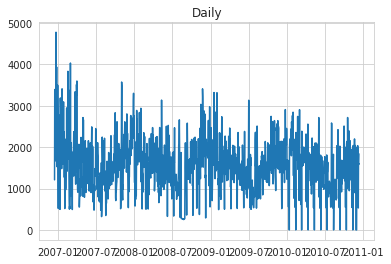

In [8]:
# plot daily chart
plt.plot(df_daily['active_power'])
plt.title('Daily')
plt.show()

In [9]:
df_weekly.head()

,active_power,reactive_power,voltage,current_intensty,active_energy_kitchen,active_energy_laundry,active_energy_ac,other_active_energy
Date_Time,,,,,,,,
2006-12-17,4599.64,260.93,439277.85,19579.40,2033.00,4733.00,18267.00,51627.60
2006-12-24,17483.79,1176.44,2433004.28,74020.20,11190.00,21420.00,77482.00,181304.53
2006-12-31,19743.32,1452.55,2438450.83,83051.40,14237.00,22630.00,67273.00,224915.40
2007-01-07,11613.89,1106.18,2407584.64,49246.40,10773.00,8671.00,61414.00,112706.87
2007-01-14,14314.29,1473.49,2408960.49,61065.40,24526.00,15027.00,69659.00,129359.43


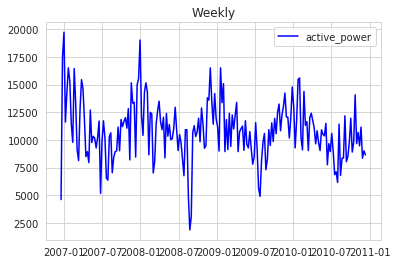

In [10]:
# plot weekly chart
plt.plot(df_weekly['active_power'], '-b', label='active_power')
plt.legend(loc='upper right')
plt.title('Weekly')
plt.show()

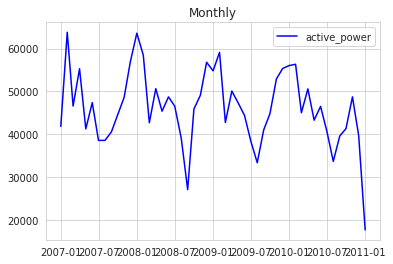

In [11]:
# plot monthly chart
plt.plot(df_monthly['active_power'], '-b', label='active_power')
plt.legend(loc='upper right')
plt.title('Monthly')
plt.show()

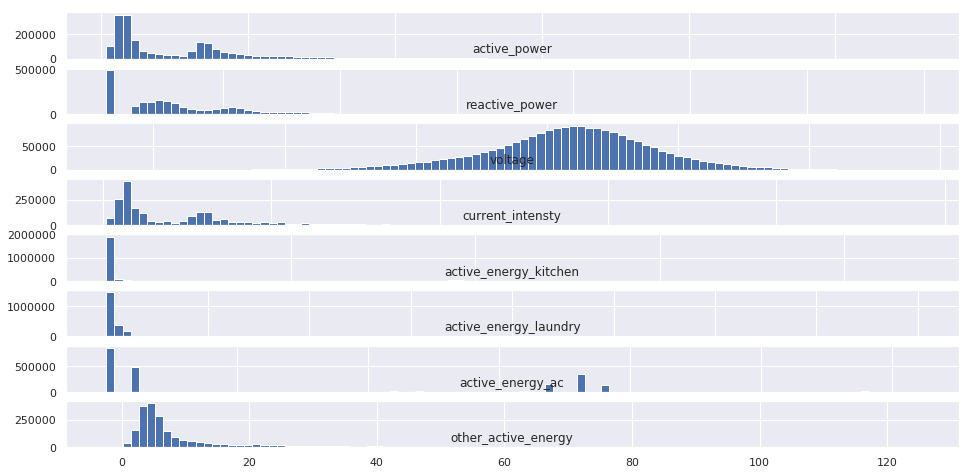

In [12]:
sns.set(rc={"figure.figsize": (16, 8)})
plt.figure()
for i in range(len(df.columns)):
    plt.subplot(len(df.columns), 1, i+1)
    name = df.columns[i]
    df[name].hist(bins=100)
    plt.title(name, y=0)
plt.show()

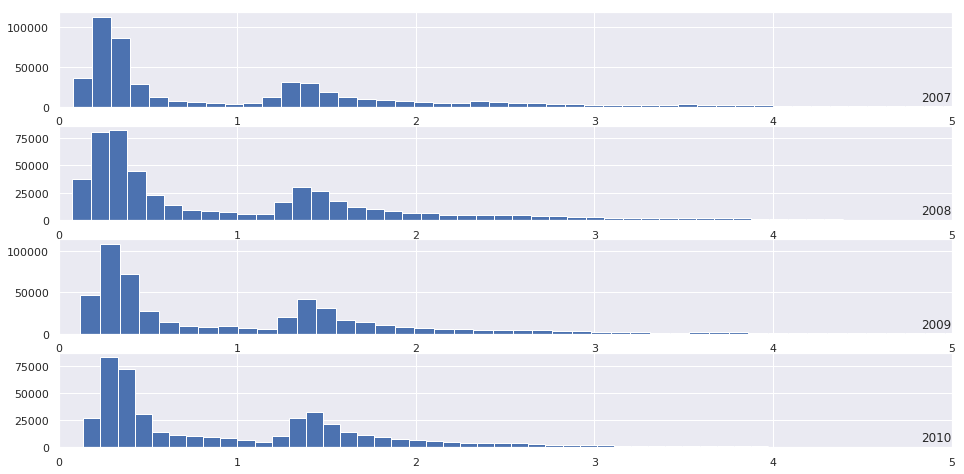

In [13]:
# plot active power for each year
sns.set(rc={"figure.figsize": (16, 8)})
years = ['2007', '2008', '2009', '2010']
plt.figure()
for i in range(len(years)):
    # prepare subplot
    ax = plt.subplot(len(years), 1, i+1)
    # determine the year to plot
    year = years[i]
    # get all observations for the year
    result = df[str(year)]
    # plot the active power
    result['active_power'].hist(bins=100)
    # zoom in on the distribution
    ax.set_xlim(0, 5)
    # add a title to the subplot
    plt.title(str(year), y=0, loc='right')
plt.show()

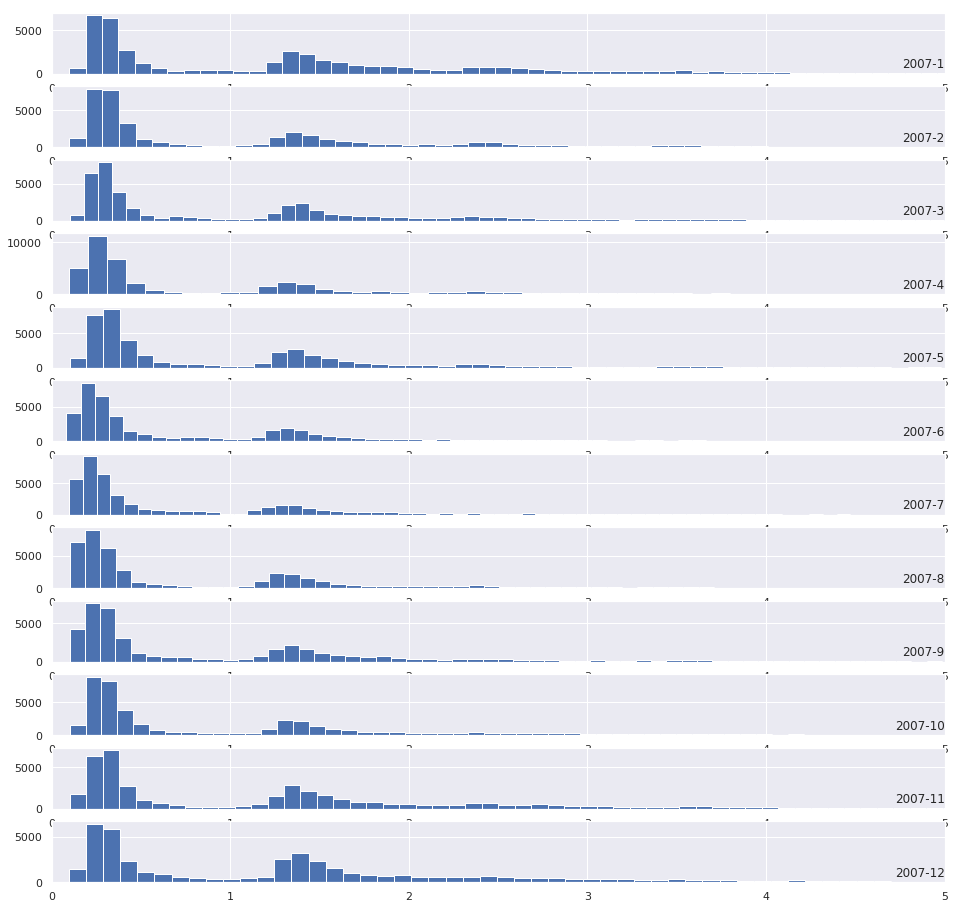

In [14]:
# plot active power for each year
sns.set(rc={"figure.figsize": (16, 16)})
months = [x for x in range(1, 13)]
plt.figure()
for i in range(len(months)):
    # prepare subplot
    ax = plt.subplot(len(months), 1, i+1)
    # determine the month to plot
    month = '2007-' + str(months[i])
    # get all observations for the month
    result = df[month]
    # plot the active power for the month
    result['active_power'].hist(bins=100)
    # zoom in on the distribution
    ax.set_xlim(0, 5)
    # add a title to the subplot
    plt.title(month, y=0, loc='right')
plt.show()


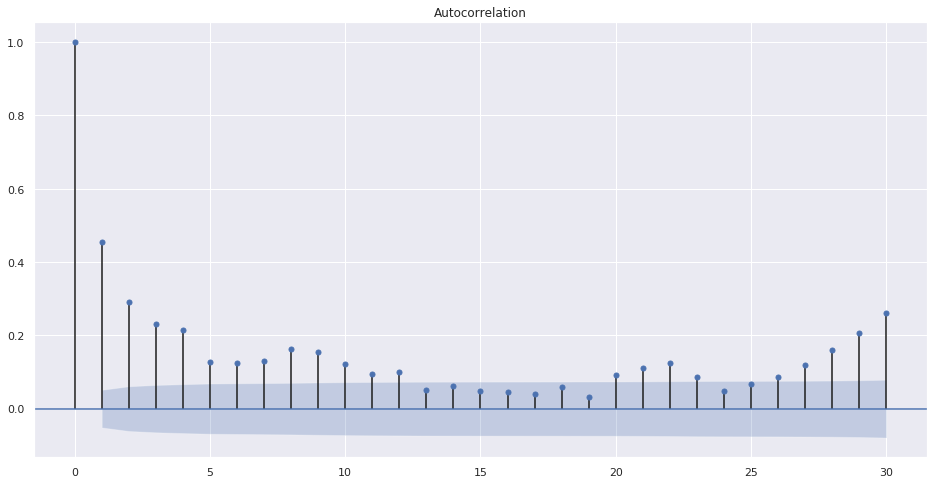

In [15]:
# Daily
sns.set(rc={"figure.figsize": (16, 8)})
lags = 30
# acf
plot_acf(df_daily['active_power'], lags=lags)
plt.show()

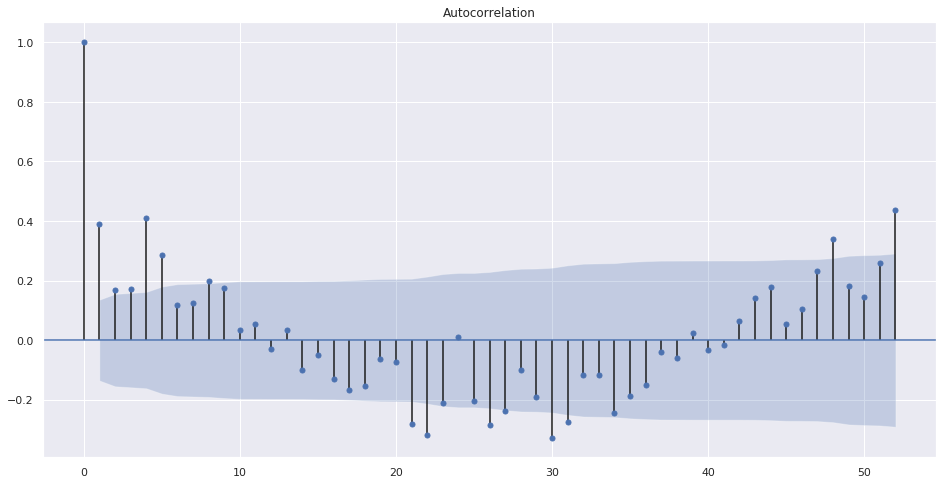

In [16]:
#Weekly
sns.set(rc={"figure.figsize": (16, 8)})
lags = 52
# acf
plot_acf(df_weekly['active_power'], lags=lags)
plt.show()

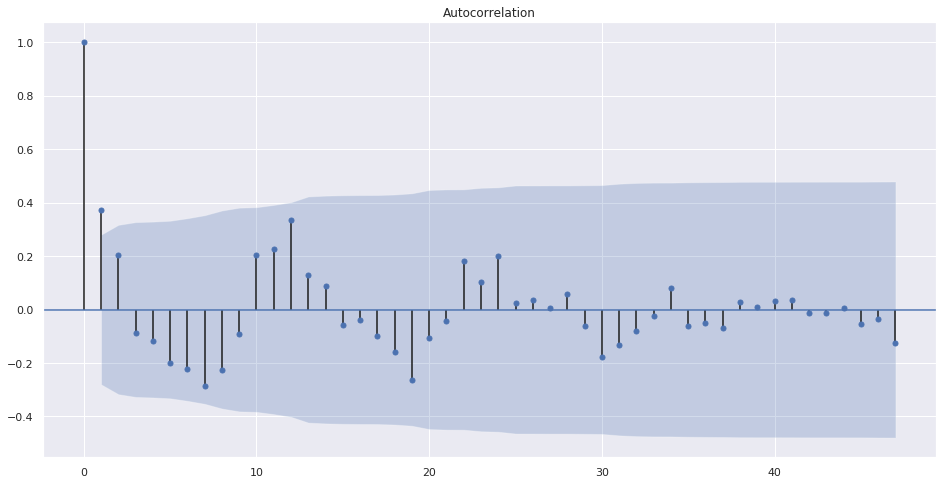

In [17]:
#Monthly
sns.set(rc={"figure.figsize": (16, 8)})
lags = 47
# acf
plot_acf(df_monthly['active_power'], lags=lags)
plt.show()

# Differencing

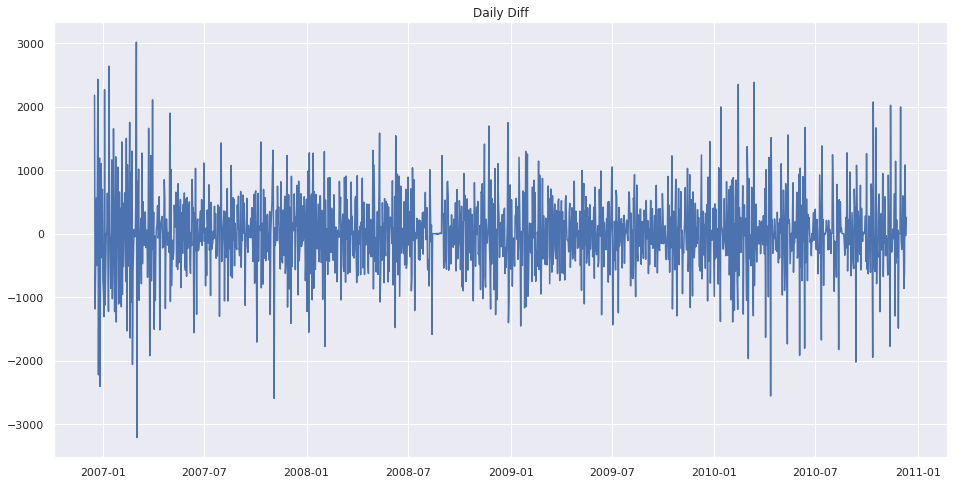

In [18]:
# plot the daily diff
sns.set(rc={"figure.figsize": (16, 8)})
plt.plot(df_daily['active_power'].diff())
plt.title('Daily Diff')
plt.show()

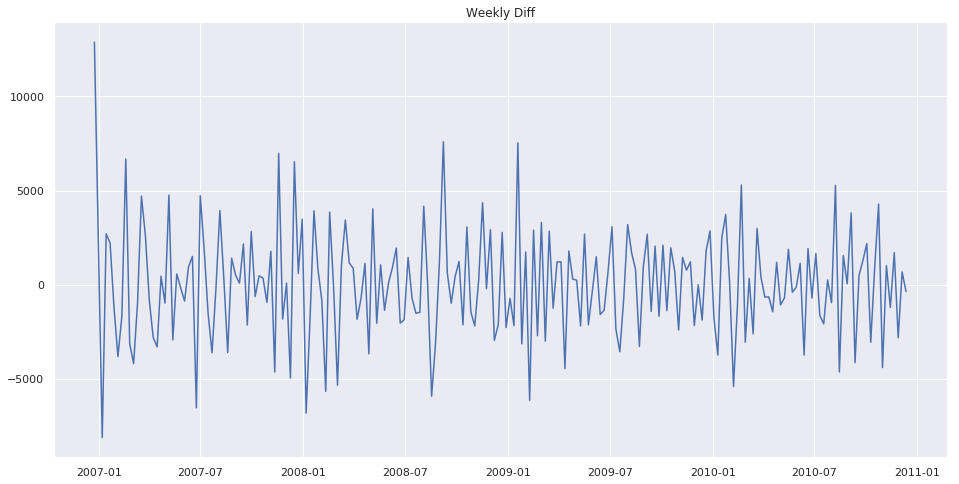

In [19]:
# plot the weekly diff
sns.set(rc={"figure.figsize": (16, 8)})
plt.plot(df_weekly['active_power'].diff())
plt.title('Weekly Diff')
plt.show()

# Time Series Decomposition

[16.0, 8.0]


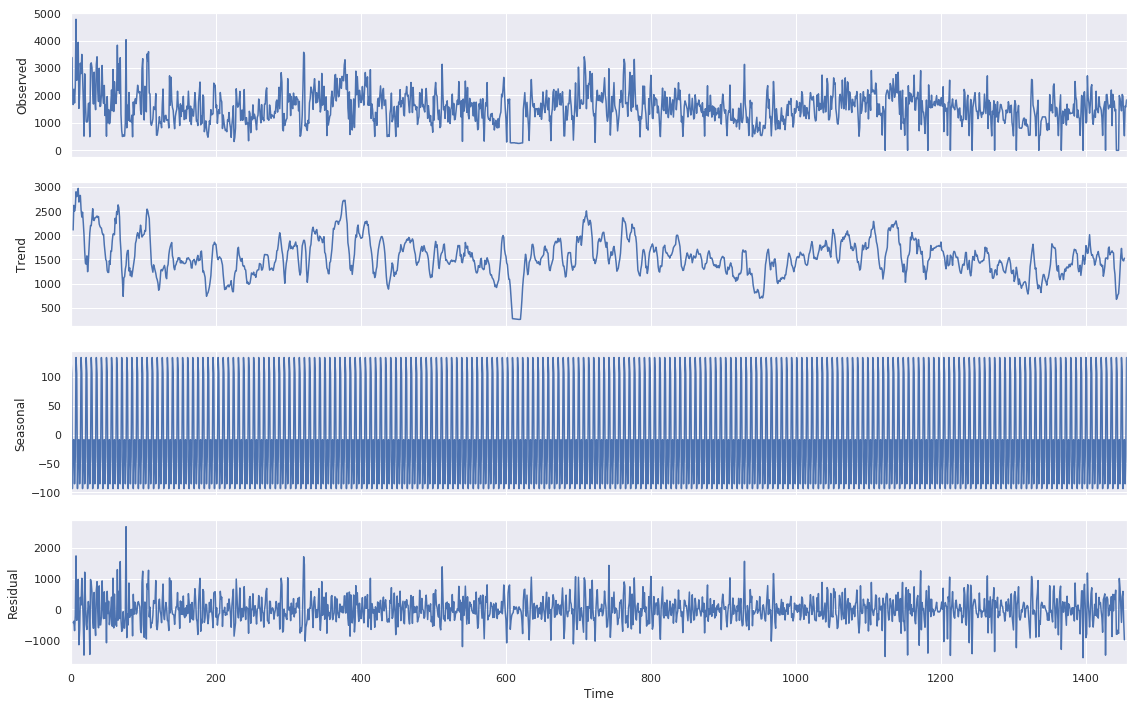

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
print(rcParams['figure.figsize'])
rcParams['figure.figsize'] = 16, 10
series = df_daily['active_power'].dropna().values
result = seasonal_decompose(series, model='additive', freq=7)
result.plot()
plt.show()
rcParams['figure.figsize'] = 6, 4

In [21]:
df_daily['dow'] = df_daily.index.dayofweek
df_daily['trend'] = result.trend
df_daily['seasonal'] = result.seasonal
df_daily['resid'] = result.resid
df_daily

,active_power,reactive_power,voltage,current_intensty,active_energy_kitchen,active_energy_laundry,active_energy_ac,other_active_energy,dow,trend,seasonal,resid
Date_Time,,,,,,,,,,,,
2006-12-16,1209.18,34.92,93552.53,5180.80,0.00,546.00,4926.00,14680.93,5,nan,133.14,nan
2006-12-17,3390.46,226.01,345725.32,14398.60,2033.00,4187.00,13341.00,36946.67,6,nan,104.93,nan
2006-12-18,2203.83,161.79,347373.64,9247.20,1063.00,2621.00,14018.00,19028.43,0,nan,-93.56,nan
2006-12-19,1666.19,150.94,348479.01,7094.00,839.00,7602.00,6197.00,13131.90,1,2108.58,-12.01,-430.38
2006-12-20,2225.75,161.00,348923.61,9313.00,0.00,2648.00,14063.00,20384.80,2,2617.75,-8.96,-383.04
2006-12-21,1723.29,144.43,347096.41,7266.40,1765.00,2692.00,10456.00,13808.47,3,2497.68,-85.26,-689.14
2006-12-22,2341.34,186.91,347305.75,9897.00,3151.00,350.00,11131.00,24390.30,4,2574.73,-38.30,-195.09
2006-12-23,4773.39,221.47,345795.95,20200.40,2669.00,425.00,14726.00,61736.43,5,2898.71,133.14,1741.53
2006-12-24,2550.01,149.90,348029.91,11002.20,1703.00,5082.00,6891.00,28824.20,6,2799.14,104.93,-354.07


# Smoothing

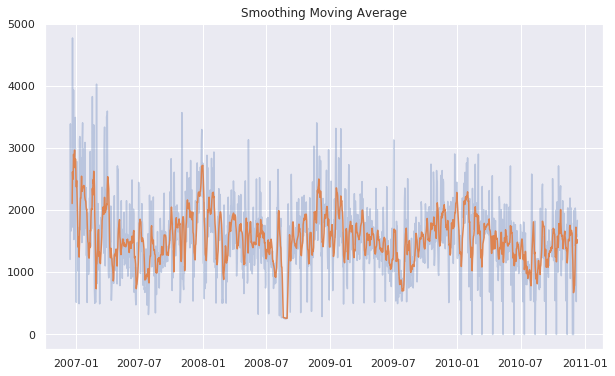

In [22]:
# rolling - moving average
plt.figure(figsize=(10,6))
plt.title('Smoothing Moving Average')
plt.plot(df_daily['active_power'], alpha=0.3)
plt.plot(df_daily['active_power'].rolling(window=7).mean())
plt.show()

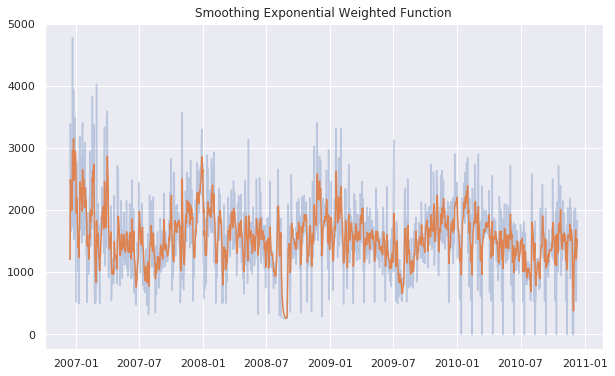

In [23]:
# exponential weighted functions
plt.figure(figsize=(10,6))
plt.title('Smoothing Exponential Weighted Function')
plt.plot(df_daily['active_power'], alpha=0.3)
plt.plot(df_daily['active_power'].ewm(alpha=0.3).mean())
plt.show()

# Simple anomaly detection

-0.7218973363591861
447.501338113438


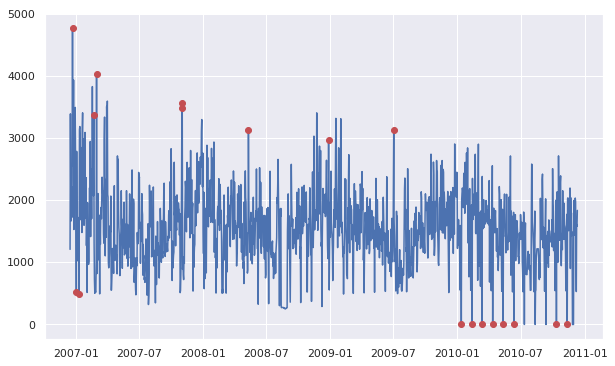

In [24]:
resid_mean = df_daily['resid'].dropna().mean()
resid_std = df_daily['resid'].dropna().std()
print(resid_mean)
print(resid_std)

n_std = 3
df_anomaly = df_daily[(df_daily['resid'] < resid_mean - n_std * resid_std)|(df_daily['resid'] > resid_mean + n_std * resid_std)]

plt.figure(figsize=(10,6))
plt.plot(df_daily['active_power'])
for k, v in df_anomaly.iterrows():
    plt.plot(k, v['active_power'], 'or')
plt.show()

# Time series prediction

# Stats approach

Date_Time
2010-12-05   2035.42
2010-12-06   1973.38
2010-12-07   1109.57
2010-12-08    529.70
2010-12-09   1612.09
2010-12-10   1579.69
2010-12-11   1836.82
Freq: D, Name: active_power, dtype: float64
2010-12-12   1648.43
2010-12-13   1737.04
2010-12-14   1695.52
2010-12-15   1604.82
2010-12-16   1597.11
2010-12-17   1515.51
2010-12-18   1433.70
2010-12-19   1358.52
2010-12-20   1261.87
2010-12-21   1368.98
2010-12-22   1395.35
2010-12-23   1539.80
2010-12-24   1498.83
2010-12-25   1531.03
2010-12-26   1568.35
Freq: D, dtype: float64


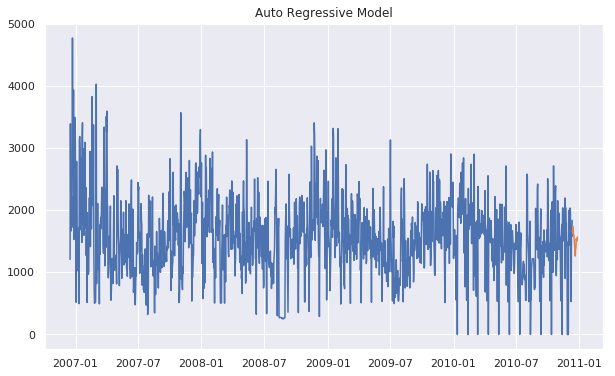

In [26]:
# Autoregressive Model
from statsmodels.tsa.ar_model import AR
model = AR(df_daily['active_power'])
# fit model
model_fit = model.fit()
print(df_daily['active_power'].tail(7))
# calculate prediction
yhat = model_fit.predict(len(df_daily['active_power']), len(df_daily['active_power'])+14)
print(yhat)
# plot results
plt.figure(figsize=(10,6))
plt.title('Auto Regressive Model')
plt.plot(df_daily['active_power'])
plt.plot(yhat)
plt.show()

2010-12-12   1667.22
2010-12-13   1551.60
2010-12-14   1551.60
2010-12-15   1551.60
2010-12-16   1551.60
2010-12-17   1551.60
2010-12-18   1551.60
2010-12-19   1551.60
2010-12-20   1551.60
2010-12-21   1551.60
2010-12-22   1551.60
2010-12-23   1551.60
2010-12-24   1551.60
2010-12-25   1551.60
2010-12-26   1551.60
Freq: D, dtype: float64


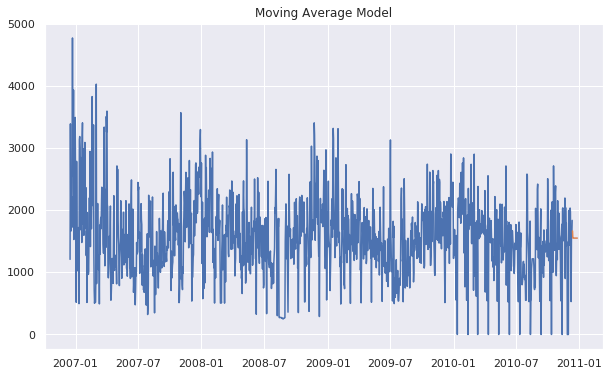

In [27]:
# Moving Average
from statsmodels.tsa.arima_model import ARMA
# fit model
model = ARMA(df_daily['active_power'], order=(0, 1))
model_fit = model.fit()
# calculate prediction
yhat = model_fit.predict(len(df_daily['active_power']), len(df_daily['active_power'])+14)
print(yhat)
# plot results
plt.figure(figsize=(10,6))
plt.title('Moving Average Model')
plt.plot(df_daily['active_power'])
plt.plot(yhat)
plt.show()

2010-12-12   1647.39
2010-12-13   1620.21
2010-12-14   1600.79
2010-12-15   1586.91
2010-12-16   1577.00
2010-12-17   1569.91
2010-12-18   1564.85
2010-12-19   1561.23
2010-12-20   1558.65
2010-12-21   1556.80
2010-12-22   1555.48
2010-12-23   1554.54
2010-12-24   1553.86
2010-12-25   1553.38
2010-12-26   1553.04
Freq: D, dtype: float64


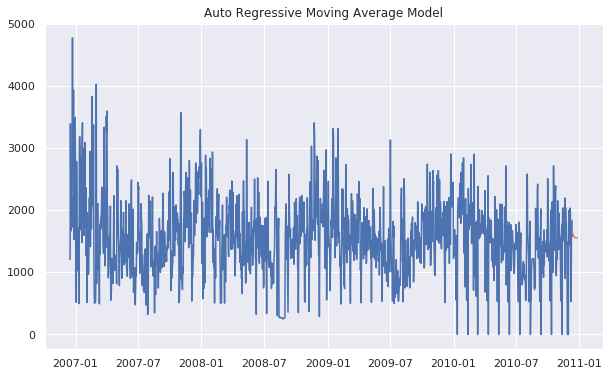

In [28]:
# Autoregressive Moving Average
from statsmodels.tsa.arima_model import ARMA
# fit model
model = ARMA(df_daily['active_power'], order=(1, 1))
model_fit = model.fit()
# calculate prediction
yhat = model_fit.predict(len(df_daily['active_power']), len(df_daily['active_power'])+14)
print(yhat)
# plot results
plt.figure(figsize=(10,6))
plt.title('Auto Regressive Moving Average Model')
plt.plot(df_daily['active_power'])
plt.plot(yhat)
plt.show()

2010-12-12   1447.82
2010-12-13   1440.99
2010-12-14    924.24
2010-12-15   1251.62
2010-12-16   1883.50
2010-12-17   1746.31
2010-12-18   1368.98
2010-12-19   1506.64
2010-12-20   1499.81
2010-12-21    983.06
2010-12-22   1310.45
2010-12-23   1942.33
2010-12-24   1805.13
2010-12-25   1427.81
2010-12-26   1565.47
Freq: D, dtype: float64


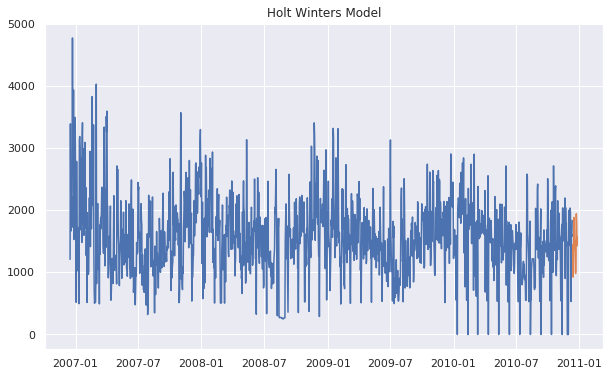

In [29]:
# Holt Winters 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# fit model
model = ExponentialSmoothing(df_daily['active_power'], trend='add', seasonal='add', seasonal_periods=7)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.1, smoothing_seasonal=0.5)
# calculate prediction
yhat = model_fit.predict(len(df_daily['active_power']), len(df_daily['active_power'])+14)
print(yhat)
plt.figure(figsize=(10,6))
plt.title('Holt Winters Model')
plt.plot(df_daily['active_power'])
plt.plot(yhat)
plt.show()

In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# fit model
model = ExponentialSmoothing(df_daily['active_power'], trend='add', seasonal='add', seasonal_periods=7)
for l in range(0, 10, 2):
    for sl in range(0, 10, 2):
        for se in range(0, 10, 2):
            model_fit = model.fit(smoothing_level=l/10.0, smoothing_slope=sl/10.0, smoothing_seasonal=se/10.0)
            # calculate prediction
            yhat = model_fit.predict(len(df_daily['active_power']),len(df_daily['active_power'])+2)
            print(l/10.0, sl/10.0, se/10.0)
            print(yhat)

0.0 0.0 0.0
2010-12-12   182408.70
2010-12-13   181344.85
2010-12-14   180930.00
Freq: D, dtype: float64
0.0 0.0 0.2
2010-12-12   5627.68
2010-12-13   5693.03
2010-12-14   5392.81
Freq: D, dtype: float64
0.0 0.0 0.4
2010-12-12   3460.13
2010-12-13   3536.76
2010-12-14   3121.54
Freq: D, dtype: float64
0.0 0.0 0.6
2010-12-12   2853.99
2010-12-13   2903.87
2010-12-14   2343.11
Freq: D, dtype: float64
0.0 0.0 0.8
2010-12-12   2746.61
2010-12-13   2730.75
2010-12-14   2024.45
Freq: D, dtype: float64
0.0 0.2 0.0
2010-12-12   182408.70
2010-12-13   181344.85
2010-12-14   180930.00
Freq: D, dtype: float64
0.0 0.2 0.2
2010-12-12   5627.68
2010-12-13   5693.03
2010-12-14   5392.81
Freq: D, dtype: float64
0.0 0.2 0.4
2010-12-12   3460.13
2010-12-13   3536.76
2010-12-14   3121.54
Freq: D, dtype: float64
0.0 0.2 0.6
2010-12-12   2853.99
2010-12-13   2903.87
2010-12-14   2343.11
Freq: D, dtype: float64
0.0 0.2 0.8
2010-12-12   2746.61
2010-12-13   2730.75
2010-12-14   2024.45
Freq: D, dtype: float6

0.6 0.2 0.2
2010-12-12   1834.18
2010-12-13   1963.61
2010-12-14   1720.82
Freq: D, dtype: float64
0.6 0.2 0.4
2010-12-12   1932.93
2010-12-13   2223.04
2010-12-14   2107.74
Freq: D, dtype: float64
0.6 0.2 0.6
2010-12-12   1889.05
2010-12-13   2095.35
2010-12-14   1953.70
Freq: D, dtype: float64
0.6 0.2 0.8
2010-12-12   1415.34
2010-12-13   1257.71
2010-12-14    923.30
Freq: D, dtype: float64
0.6 0.4 0.0
2010-12-12   1829.56
2010-12-13   1722.82
2010-12-14   1899.53
Freq: D, dtype: float64
0.6 0.4 0.2
2010-12-12   2094.46
2010-12-13   2346.08
2010-12-14   2161.41
Freq: D, dtype: float64
0.6 0.4 0.4
2010-12-12   2034.32
2010-12-13   2748.99
2010-12-14   3198.62
Freq: D, dtype: float64
0.6 0.4 0.6
2010-12-12    -7252.63
2010-12-13   -21634.39
2010-12-14   -34804.91
Freq: D, dtype: float64
0.6 0.4 0.8
2010-12-12   -14243007599544.74
2010-12-13   -49356352492410.57
2010-12-14   -87079848580862.03
Freq: D, dtype: float64
0.6 0.6 0.0
2010-12-12   1973.46
2010-12-13   1975.87
2010-12-14   226

In [31]:
df_daily.to_csv('power_consumption_daily.csv')